## Librosa Kütüphanesinin Yüklenmesi

In [0]:
!pip install librosa

## Ses Dosyasının Yüklenmesi

In [0]:
import librosa
ses_dosyası="file_trim_5s.mp3"
x,sr=librosa.load(ses_dosyası)
print("x type:",type(x),"sr type:",type(sr))
print(x.shape,sr)

x type: <class 'numpy.ndarray'> sr type: <class 'int'>
(110250,) 22050


## Sesin Oynatılması

In [0]:
import IPython.display as ipd
ipd.Audio(ses_dosyası)

In [0]:
x,sr=librosa.load(ses_dosyası,sr=11025)
ipd.Audio(x,rate=sr)

In [0]:
print(x.shape,sr)

(110250,) 22050


## Sesi kaydetme



In [0]:
x, sr = librosa.load(librosa.util.example_audio_file())
librosa.output.write_wav('ses_kayit.wav', x, sr)

In [0]:
ses1="ses_kayit.wav"
ipd.Audio(ses1)

## Sesi Görüntüleme

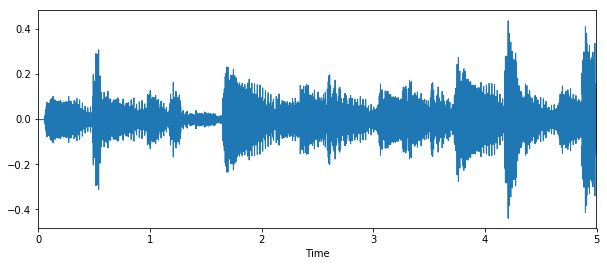

In [0]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,4))
librosa.display.waveplot(x,sr=sr)

## Spektrogram

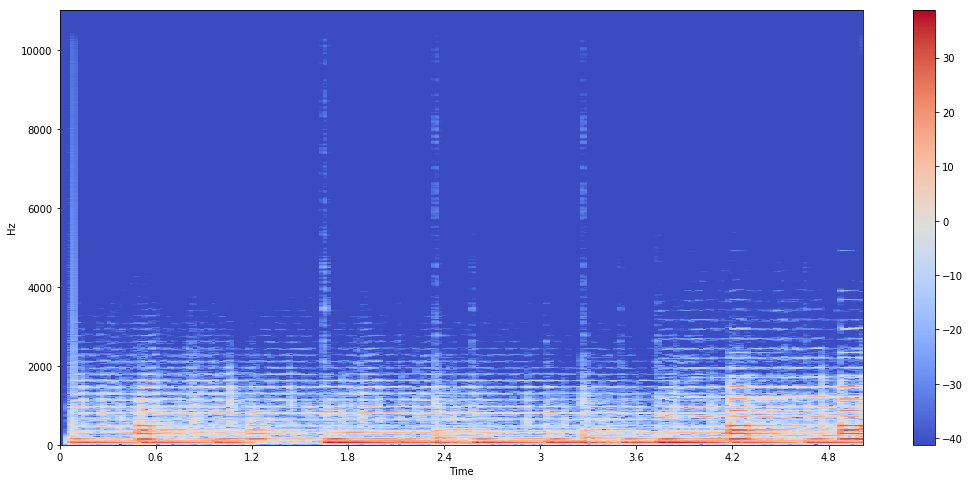

In [0]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18,8))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

## Feature Extraction - Öznitelik Çıkarımı

### Mel-Frekans Kepstral Katsayıları (Mel-Frequency Cepstral Coefficients)

In [0]:
mfkk=librosa.feature.mfcc(x,sr=sr)
print(mfkk.shape)

(20, 216)


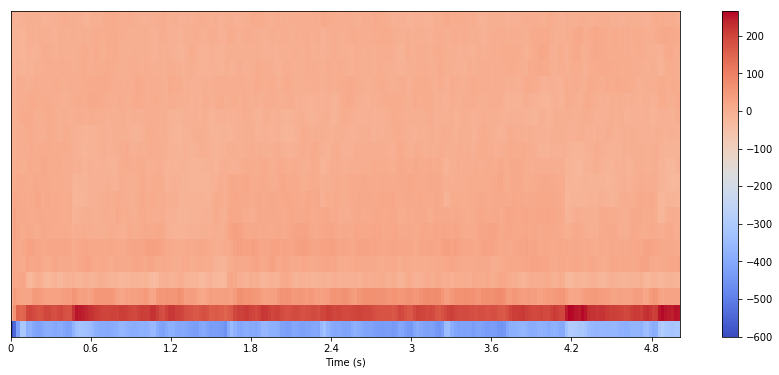

In [0]:
plt.figure(figsize=(15,6))
librosa.display.specshow(mfkk,x_axis="s")
plt.colorbar()

### Zero Crossing Rate

In [0]:
bas=5000
son=5100
zero_cross=librosa.zero_crossings(x[bas:son])
sum(zero_cross)

2

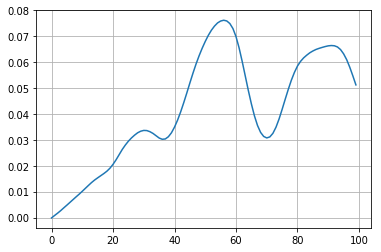

In [0]:
plt.plot(x[bas:son])
plt.grid()

### Spectral Centroid

In [0]:
spec_cent=librosa.feature.spectral_centroid(x)
spec_cent.shape

(1, 216)

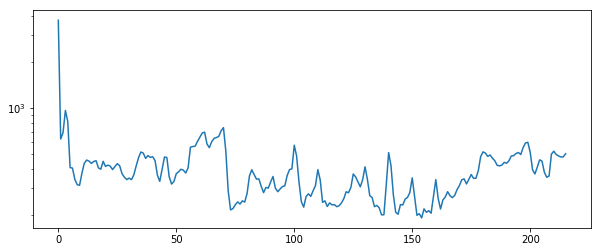

In [0]:
plt.figure(figsize=(10,4))
plt.semilogy(spec_cent.T)
plt.show()

### Spectral Rolloff

(1, 216)


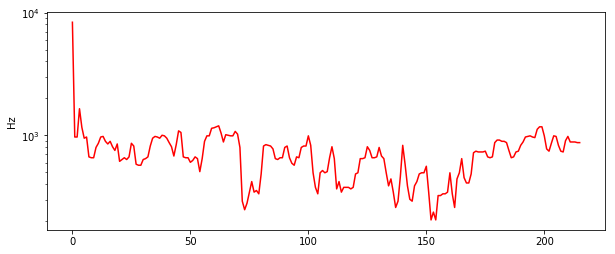

In [0]:
plt.figure(figsize=(10,4))
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")
print(spec_roll.shape)

### Chroma Frekansı

In [0]:
chroma=librosa.feature.chroma_stft(x,sr=sr)
chroma.shape

(12, 216)

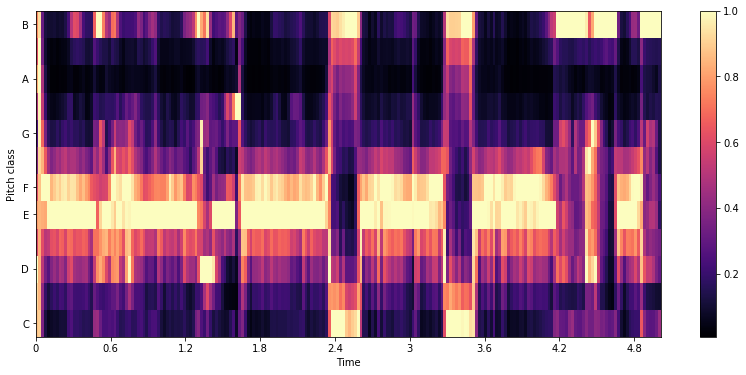

In [0]:
plt.figure(figsize=(14,6))
librosa.display.specshow(chroma,y_axis="chroma",x_axis="time")
plt.colorbar()